# Normalization by no stimuli

In [2]:
%matplotlib notebook
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
negsi_features_path = '../results/NegsiRNA_features.csv'
df_negsi = pd.read_csv(negsi_features_path, index_col=0)
df_negsi

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_C3c_CA,0.733850,0.461239,2,2.828427,0.000000,2.828427,0.000000,1.000000,0.000000,213,...,69.758472,55.838049,64.151842,51.039731,0.928818,0.035266,1156,6,3.132353,0.368235
NegsiRNA_C3b_CA,0.581828,0.913848,10,2.065685,1.209126,2.047871,1.204724,0.992621,0.023335,304,...,55.310388,35.628550,51.255141,32.524791,0.935073,0.032228,1830,5,3.121311,0.333116
NegsiRNA_E3_NO,0.583298,0.893483,0,NaN,NaN,NaN,NaN,NaN,NaN,446,...,48.109712,35.494122,44.475891,32.458687,0.933285,0.033524,2187,5,3.139918,0.358568
NegsiRNA_L2_NS,0.690188,0.566952,4,9.224874,15.898662,8.743313,14.935617,0.985439,0.029123,367,...,52.991063,46.097159,48.457418,41.626902,0.927437,0.041164,1639,5,3.153752,0.372363
NegsiRNA_L1_CA,0.623830,0.842740,2,15.207107,15.849242,15.009612,15.569942,0.992523,0.010574,281,...,56.647236,34.425614,52.494589,31.461633,0.933604,0.033201,1913,5,3.125457,0.340574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_H2_CA,0.689017,0.747116,3,10.299832,14.899824,9.001932,12.804211,0.930342,0.067686,291,...,55.008710,33.954309,50.942437,31.187113,0.932444,0.033376,2034,5,3.140118,0.351333
NegsiRNA_I3_NO,0.590003,0.861740,2,2.500000,2.121320,2.500000,2.121320,1.000000,0.000000,386,...,52.290949,37.953111,47.953077,34.082777,0.929160,0.037500,1813,5,3.128516,0.339572
NegsiRNA_I2_CA,0.600133,0.941587,0,NaN,NaN,NaN,NaN,NaN,NaN,507,...,42.572094,32.399391,39.080209,29.337301,0.930631,0.049304,3025,6,3.161653,0.385674
NegsiRNA_H3_NS,0.608080,0.862938,5,10.028427,20.188177,9.434813,18.860816,0.987135,0.028767,288,...,59.548758,39.278796,54.938723,35.721261,0.932738,0.034584,1564,5,3.116368,0.322654


In [4]:
df_negsi_0 = df_negsi.fillna(0)
df_negsi_0 = df_negsi_0.drop(columns=["e2e_n", "e2e_distance_mean", "e2e_distance_std", "e2e_eu_distance_mean", "e2e_eu_distance_std", "e2e_distance_ratio_mean", "e2e_distance_ratio_std"])

In [5]:
df_ca = df_negsi_0[df_negsi_0.index.str[-2:] == 'CA'].sort_index()
df_no = df_negsi_0[df_negsi_0.index.str[-2:] == 'NO'].sort_index()
df_ns = df_negsi_0[df_negsi_0.index.str[-2:] == 'NS'].sort_index()

In [6]:
df_ns

,cell_area_ratio,white_area_ratio,j2e_n,j2e_distance_mean,j2e_distance_std,j2e_eu_distance_mean,j2e_eu_distance_std,j2e_distance_ratio_mean,j2e_distance_ratio_std,j2j_n,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_A1_NS,0.556054,0.612578,173,23.344810,22.730040,21.629515,20.676214,0.937828,0.035145,408,73.987054,54.505582,67.916024,49.444786,0.928579,0.034625,998,5,3.133267,0.348595
NegsiRNA_A1b_NS,0.685059,0.637236,255,18.069167,20.901061,16.630237,18.700903,0.933672,0.052454,561,64.064641,50.936603,58.549305,45.990678,0.925478,0.044457,1455,5,3.146392,0.361192
NegsiRNA_A2_NS,0.673425,0.676530,254,19.397263,21.429160,18.005015,19.504959,0.942316,0.033370,605,62.646880,40.799313,57.681321,37.145793,0.928652,0.031755,1559,5,3.136626,0.347167
NegsiRNA_A2b_NS,0.630537,0.724373,247,16.695097,15.997742,15.560219,14.433171,0.941838,0.051270,607,65.203432,46.043375,59.844705,41.189162,0.929429,0.034394,1521,5,3.138725,0.356889
NegsiRNA_A3_NS,0.612708,0.819862,424,15.072028,11.523606,14.029297,10.269682,0.937172,0.061353,943,46.144437,34.970412,42.424978,31.760628,0.930726,0.038317,2381,5,3.135237,0.348063
NegsiRNA_B1_NS,0.660087,0.729832,299,15.711260,15.433841,14.590271,13.931174,0.936630,0.060779,742,56.662919,40.421432,52.287980,36.778400,0.931913,0.032581,1875,5,3.137600,0.347562
NegsiRNA_B2_NS,19.397115,0.902569,345,19.344584,14.936528,18.065387,13.235019,0.943225,0.045975,630,54.663967,40.208815,50.333098,36.287163,0.934036,0.036022,1630,5,3.133742,0.345740
NegsiRNA_B3_NS,0.607345,0.787912,259,19.116634,19.888986,17.511060,17.610255,0.932233,0.049974,730,58.602442,38.535467,53.681562,34.389451,0.927286,0.038102,1780,5,3.136517,0.353018
NegsiRNA_C1_NS,0.598435,0.802386,271,17.205097,16.309292,16.109220,14.846672,0.940725,0.056617,702,59.782561,40.974794,54.971421,37.097029,0.929983,0.035371,1731,5,3.140381,0.357221
NegsiRNA_C2_NS,0.590744,0.921342,428,17.640154,14.828169,16.359090,13.082303,0.939627,0.037443,840,49.287711,37.211670,45.235530,33.524566,0.930461,0.037944,2176,5,3.140625,0.356768


In [7]:
plates_ca = [x.split("_")[1] for x in df_ca.index]
plates_no = [x.split("_")[1] for x in df_no.index]
plates_ns = [x.split("_")[1] for x in df_ns.index]

epsilon = 1e-6

In [8]:
df_ns_2 = df_ns.copy()
df_ns_2.index = [x[:-2] + "CA" for x in df_ns.index]
df_ca_norm = df_ca / (df_ns_2)
df_ca_norm

,cell_area_ratio,white_area_ratio,j2e_n,j2e_distance_mean,j2e_distance_std,j2e_eu_distance_mean,j2e_eu_distance_std,j2e_distance_ratio_mean,j2e_distance_ratio_std,j2j_n,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_A1_CA,35.051981,1.111365,1.618497,0.760246,0.674382,0.768994,0.680942,1.007483,0.977181,1.252451,0.803870,0.820675,0.805770,0.823198,0.999926,1.068827,1.313627,1.000000,0.994714,0.941258
NegsiRNA_A1b_CA,1.015682,1.071816,1.082353,1.038995,0.840657,1.049198,0.858325,1.005719,0.788387,1.017825,0.960212,0.917434,0.963387,0.918260,1.003787,0.832554,0.978694,1.000000,0.992532,0.920744
NegsiRNA_A2_CA,1.023157,1.157225,1.271654,1.092934,0.972897,1.097028,0.980854,0.999652,1.168226,0.932231,0.919305,1.113653,0.921833,1.118733,1.004382,1.051525,0.917255,1.000000,0.995234,0.953905
NegsiRNA_A2b_CA,0.940861,1.179997,1.230769,1.157263,1.178315,1.153805,1.186491,0.999404,0.666423,1.046129,0.905165,0.947449,0.909854,0.963521,1.004162,0.991351,1.064431,1.000000,0.994176,0.922569
NegsiRNA_A3_CA,1.073228,0.844238,1.004717,0.998686,1.183314,0.996515,1.190139,1.002217,0.902087,0.809120,1.084715,1.164570,1.080879,1.151501,0.999496,1.124180,0.842083,1.000000,0.999817,1.013777
NegsiRNA_B1_CA,0.934791,1.041785,0.919732,1.302376,1.152166,1.314459,1.170913,1.004843,0.792004,0.796496,1.032766,1.077887,1.029851,1.083360,0.995738,1.174489,0.799467,1.000000,1.001858,1.061829
NegsiRNA_B2_CA,0.026870,1.200761,0.994203,1.029307,0.860827,1.033351,0.885825,1.002920,0.786174,1.111111,1.030455,0.964508,1.029503,0.962120,0.998137,1.033422,1.087117,1.200000,0.996580,0.998493
NegsiRNA_B3_CA,0.979894,1.170115,0.976834,0.969299,0.957497,0.977723,0.905299,1.013160,0.839709,1.006849,1.003679,1.007170,1.012821,1.027055,1.007362,0.857260,1.000000,1.000000,0.996239,0.940735
NegsiRNA_C1_CA,0.911916,1.171796,0.892989,1.150405,1.100448,1.132620,1.054298,0.996516,0.934211,1.054131,0.990054,0.972495,0.994332,0.973469,1.003645,0.989201,1.017331,1.000000,0.997792,0.970470
NegsiRNA_C2_CA,1.117022,0.814665,0.700935,0.889966,1.051015,0.890017,1.018633,1.004377,1.175594,0.859524,1.180990,1.276251,1.182080,1.283511,0.999732,0.966071,0.827206,1.000000,0.998563,0.983591


In [9]:
df_ns_2.index = [x[:-2] + "NO" for x in df_ns.index]
df_no_norm = df_no / (df_ns_2)
df_no_norm

,cell_area_ratio,white_area_ratio,j2e_n,j2e_distance_mean,j2e_distance_std,j2e_eu_distance_mean,j2e_eu_distance_std,j2e_distance_ratio_mean,j2e_distance_ratio_std,j2j_n,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_A1_NO,38.451598,1.374424,1.676301,0.882894,0.610460,0.891818,0.601454,1.006035,0.931071,1.264706,0.813729,0.831620,0.815705,0.833503,1.002649,0.968862,1.277555,0.800000,0.989258,0.859095
NegsiRNA_A1b_NO,0.984254,1.077990,1.674510,0.878922,0.633194,0.893045,0.648442,1.004348,1.303177,1.265597,0.782571,0.834940,0.783888,0.827349,1.004415,0.861303,1.323024,1.200000,0.998546,1.041256
NegsiRNA_A2_NO,0.800564,1.233377,1.503937,0.943580,0.721274,0.954105,0.722978,1.003263,0.990563,1.155372,0.863951,1.006118,0.860806,0.992719,1.001548,1.148071,1.159718,1.000000,0.995588,0.964568
NegsiRNA_A2b_NO,0.961966,1.073137,1.643725,1.090864,1.017982,1.087391,0.955213,1.001274,0.671777,1.092257,0.813477,0.926951,0.813099,0.925063,1.002095,1.036924,1.174227,1.000000,0.999686,0.983677
NegsiRNA_A3_NO,1.072410,0.840463,1.066038,1.070001,1.379791,1.069569,1.360128,1.000791,0.865971,0.770944,1.085655,1.186621,1.079857,1.177660,0.995731,1.025380,0.831163,1.000000,0.997480,0.970706
NegsiRNA_B1_NO,0.876017,1.373869,1.127090,1.243622,1.055432,1.251577,1.030766,1.008746,0.758949,1.012129,0.968327,0.921824,0.969493,0.921192,1.001674,1.031762,1.008533,1.000000,0.999460,1.029423
NegsiRNA_B2_NO,0.027125,1.096074,1.072464,1.060912,0.774232,1.066723,0.809508,1.000135,0.674211,1.031746,1.000059,1.008136,0.999063,1.007009,0.997474,1.161050,1.051534,1.000000,1.001632,1.024273
NegsiRNA_B3_NO,0.860644,1.326225,1.463320,0.990251,0.723614,1.016922,0.759173,1.014935,0.591765,1.116438,0.893473,0.935626,0.900142,0.950669,1.006253,0.887851,1.132584,1.000000,0.997119,0.965576
NegsiRNA_C1_NO,0.847624,1.312916,1.136531,1.209557,1.206849,1.198332,1.193235,1.001840,0.702961,1.041311,0.958807,0.952356,0.964378,0.957162,1.004493,0.882520,1.028885,1.000000,0.995527,0.948762
NegsiRNA_C2_NO,0.925333,1.014023,1.233645,1.032076,0.940599,1.040165,0.956368,1.003855,1.121570,1.025000,0.932243,0.940542,0.933996,0.940117,1.001090,0.925621,1.050551,1.000000,0.994363,0.946118


In [114]:
df_concat = pd.concat([df_ca_norm, df_no_norm])
df_concat

,cell_area_ratio,white_area_ratio,j2e_n,j2e_distance_mean,j2e_distance_std,j2e_eu_distance_mean,j2e_eu_distance_std,j2e_distance_ratio_mean,j2e_distance_ratio_std,j2j_n,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_A1_CA,35.051981,1.111365,1.618497,0.760246,0.674382,0.768994,0.680942,1.007483,0.977181,1.252451,0.803870,0.820675,0.805770,0.823198,0.999926,1.068827,1.313627,1.000000,0.994714,0.941258
NegsiRNA_A1b_CA,1.015682,1.071816,1.082353,1.038995,0.840657,1.049198,0.858325,1.005719,0.788387,1.017825,0.960212,0.917434,0.963387,0.918260,1.003787,0.832554,0.978694,1.000000,0.992532,0.920744
NegsiRNA_A2_CA,1.023157,1.157225,1.271654,1.092934,0.972897,1.097028,0.980854,0.999652,1.168226,0.932231,0.919305,1.113653,0.921833,1.118733,1.004382,1.051525,0.917255,1.000000,0.995234,0.953905
NegsiRNA_A2b_CA,0.940861,1.179997,1.230769,1.157263,1.178315,1.153805,1.186491,0.999404,0.666423,1.046129,0.905165,0.947449,0.909854,0.963521,1.004162,0.991351,1.064431,1.000000,0.994176,0.922569
NegsiRNA_A3_CA,1.073228,0.844238,1.004717,0.998686,1.183314,0.996515,1.190139,1.002217,0.902087,0.809120,1.084715,1.164570,1.080879,1.151501,0.999496,1.124180,0.842083,1.000000,0.999817,1.013777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_I2_NO,0.918436,1.197764,1.128617,0.975536,0.797260,0.990951,0.808269,1.005004,0.745838,1.023546,0.981178,0.917242,0.989100,0.935928,1.002704,0.818149,1.051054,0.800000,1.000489,0.995293
NegsiRNA_I3_NO,0.926843,1.100605,1.176829,1.018099,1.050221,1.021456,1.034111,1.001043,0.855143,1.115873,0.901435,0.895616,0.897415,0.884973,0.998153,1.070546,1.138819,1.000000,1.002334,1.022441
NegsiRNA_L1_NO,0.898235,1.291128,1.102041,1.267924,1.083707,1.277473,1.122117,0.999758,0.871773,0.932302,1.008776,1.030542,1.007657,1.024945,1.000496,1.030551,0.940923,0.833333,0.994394,0.936658
NegsiRNA_L2_NO,0.926580,1.312071,1.269755,1.000146,0.686283,1.011229,0.723838,1.001170,0.959165,1.194158,0.895635,0.842919,0.895816,0.836710,1.001759,1.021384,1.151312,1.000000,0.991240,0.908565


In [1]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=10))
pca_pipe.fit(df_norm)
pca = pca_pipe.named_steps['pca']

NameError: name 'make_pipeline' is not defined

<IPython.core.display.Javascript object>


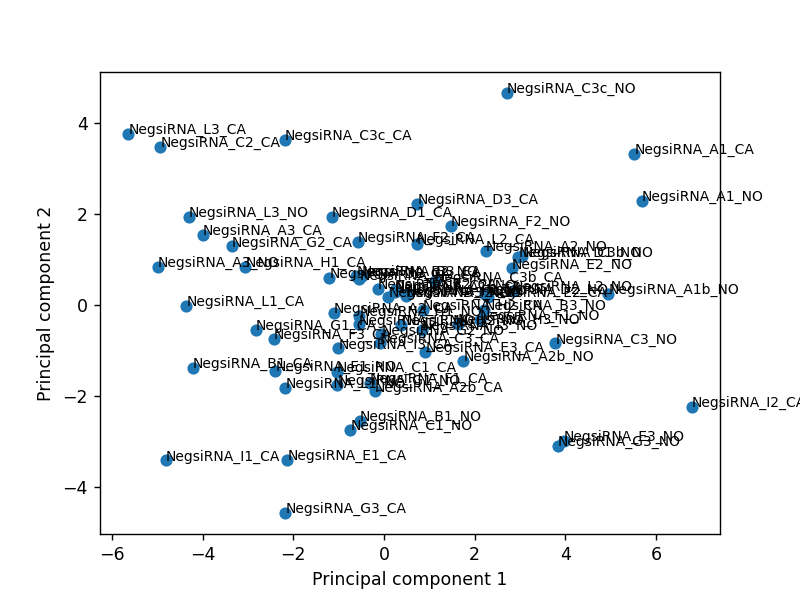

In [116]:
pca_array = pca_pipe.transform(df_concat)
fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(pca_array[:, 0], pca_array[:, 1])

labels = list(df_concat.index)

for index, label in enumerate(labels):
    ax.text(pca_array[index, 0], pca_array[index, 1], label, fontsize=8)

<IPython.core.display.Javascript object>


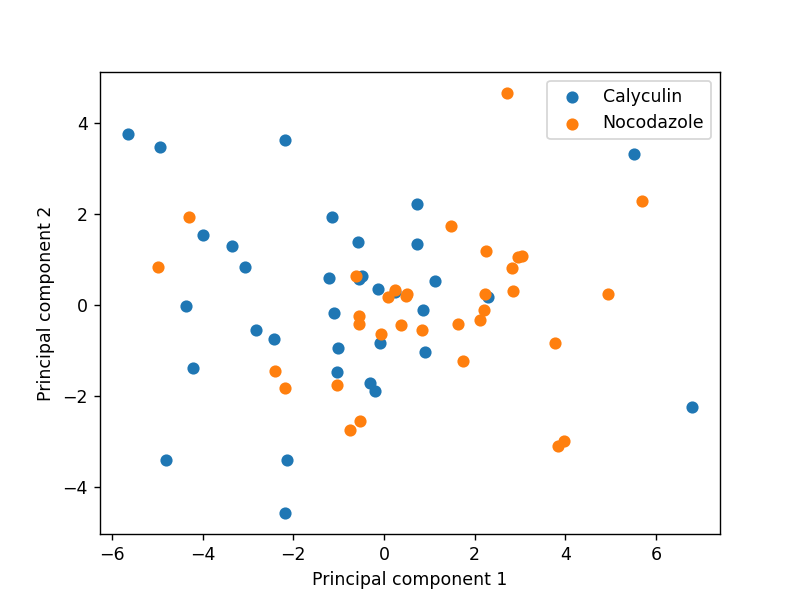

In [117]:
ca_transformed = pca_pipe.transform(df_ca_norm)
no_transformed = pca_pipe.transform(df_no_norm)
ns_transformed = pca_pipe.transform(df_ns)

fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.scatter(ca_transformed[:, 0], ca_transformed[:, 1], label='Calyculin')
ax.scatter(no_transformed[:, 0], no_transformed[:, 1], label='Nocodazole')

#for index, label in enumerate(df_ca.index):
#    ax.text(ca_transformed[index, 0], ca_transformed[index, 1], label, fontsize=8)
#for index, label in enumerate(df_ns.index):
#    ax.text(ns_transformed[index, 0], ns_transformed[index, 1], label, fontsize=8)
#for index, label in enumerate(df_no.index):
#    ax.text(no_transformed[index, 0], no_transformed[index, 1], label, fontsize=8)
#ax.scatter(ns_transformed[:, 0], ns_transformed[:, 1], label='No stimulo')
ax.legend()

In [96]:
X = df_concat.to_numpy()
y = df_concat.index.map(lambda x: x[-2:])
X.shape, y.shape

((68, 20), (68,))

In [107]:
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=5)

In [108]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [109]:
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          CA       0.57      0.57      0.57         7
          NO       0.70      0.70      0.70        10

    accuracy                           0.65        17
   macro avg       0.64      0.64      0.64        17
weighted avg       0.65      0.65      0.65        17



<IPython.core.display.Javascript object>


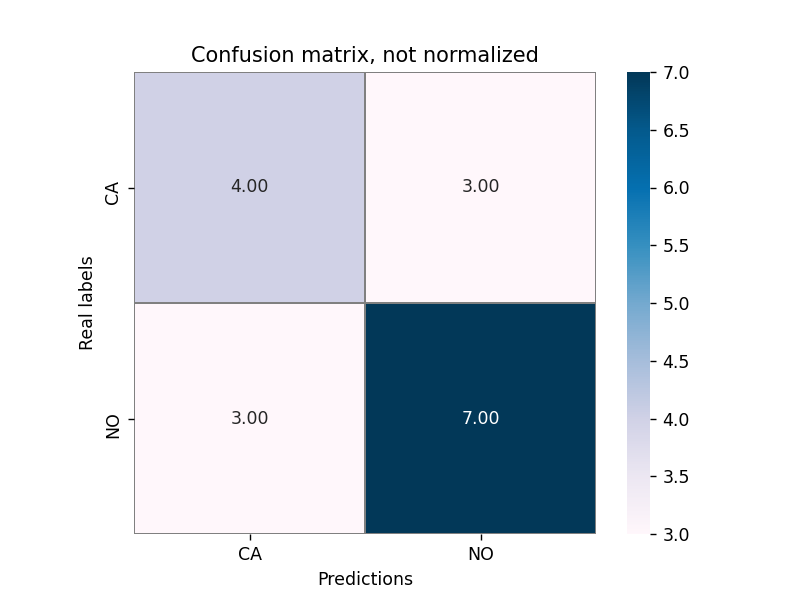

Text(0.5, 1.0, 'Confusion matrix, not normalized')

In [110]:
labels = ['CA', 'NO']
cm = confusion_matrix(y_test, preds, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

ax = sns.heatmap(df_cm, square=True, cmap='PuBu', fmt='.2f', annot=True, linewidths=0.1, linecolor='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Real labels')
ax.set_title('Confusion matrix, not normalized')

<IPython.core.display.Javascript object>


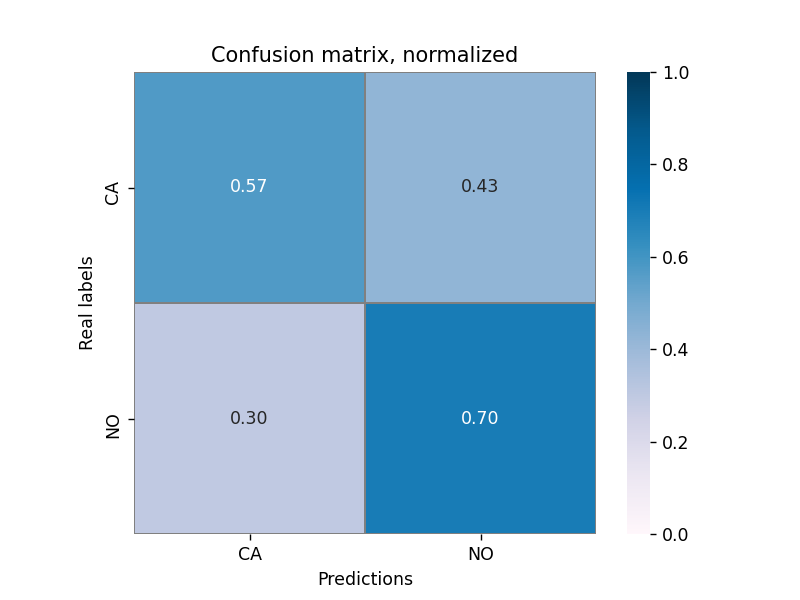

Text(0.5, 1.0, 'Confusion matrix, normalized')

In [111]:
cm_n = cm / cm.sum(axis=1)[:, np.newaxis] # normalización
df_cm_n = pd.DataFrame(cm_n, index=labels, columns=labels)
ax = sns.heatmap(df_cm_n, square=True, cmap='PuBu', fmt='.2f', annot=True, vmin=0, vmax=1, linewidths=0.1, linecolor='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Real labels')
ax.set_title('Confusion matrix, normalized')